### Assignment - DS - Mechademy - Shubham Mahobia


In [72]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import plotly.express as px


##### Exploring the Dataset for analysis



In [73]:
df = pd.read_csv('data/data.csv')


In [74]:
df.head()


,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [75]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

In [76]:
df.describe()


,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,15990.000000,16055.000000,15979.000000,16041.000000,16076.000000,16019.000000,16056.000000,16009.000000,16010.000000,16063.000000,...,16084.000000,15969.000000,16051.000000,16015.000000,16058.000000,16029.000000,16042.000000,16031.000000,16031.000000,16033.000000
mean,39.494553,21.665733,38.201314,20.239922,37.945608,19.052613,50.289131,6.469934,59.162913,19.672472,...,18.851085,40.318199,6.218582,755.757602,78.977595,4.195988,38.457150,2.783507,24.854981,25.093780
std,10.129513,2.594309,10.144388,2.783050,10.769813,2.346158,18.722516,8.867993,52.657787,2.879815,...,2.528783,11.168678,7.554684,13.643585,28.565660,4.409729,21.318655,6.094732,26.214960,25.523631
min,-77.265503,6.543921,-71.406273,4.613485,-81.446225,5.921094,-141.640143,-42.987365,-353.393026,3.578021,...,4.476511,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,37.757500,20.533333,36.592500,19.266667,35.200000,18.061111,45.290000,2.930000,37.066667,18.500000,...,17.890000,38.230000,3.000000,750.800000,71.000000,2.000000,29.000000,0.450000,12.179924,12.193789
50%,40.293333,21.767500,38.400000,20.290000,38.090000,19.050000,48.854429,6.263333,62.766667,19.600000,...,18.890000,40.363333,6.000000,756.200000,84.166667,4.000000,40.000000,2.750000,24.866978,24.834261
75%,43.000000,22.760000,41.433333,21.356667,41.560833,20.100000,53.918333,9.690000,86.590000,21.000000,...,20.200000,43.790000,9.250000,762.100000,91.988095,6.000000,40.000000,5.308333,37.950236,37.971764
max,77.265503,36.823982,71.406273,35.921144,81.446225,32.157594,141.640143,55.932271,353.393026,35.712952,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617


In [77]:
df.isnull().sum()
#As we can see there are null values in the dataset 


timestamp                         0
equipment_energy_consumption    844
lighting_energy                 809
zone1_temperature               867
zone1_humidity                  801
zone2_temperature               853
zone2_humidity                  867
zone3_temperature               802
zone3_humidity                  878
zone4_temperature               816
zone4_humidity                  781
zone5_temperature               838
zone5_humidity                  801
zone6_temperature               848
zone6_humidity                  847
zone7_temperature               794
zone7_humidity                  805
zone8_temperature               848
zone8_humidity                  777
zone9_temperature               773
zone9_humidity                  888
outdoor_temperature             806
atmospheric_pressure            842
outdoor_humidity                799
wind_speed                      828
visibility_index                815
dew_point                       826
random_variable1            

In [78]:
#As there are null values in the output column[equipment_energy_consumption = 844] as well so to 
#match the count of the output column with the input column we will drop the null values

#Reason - If the output column has null values then the model will not be able to predict the output for the input data

# Drop rows where equipment_energy_consumption is null
df.dropna(subset=['equipment_energy_consumption'], inplace=True)

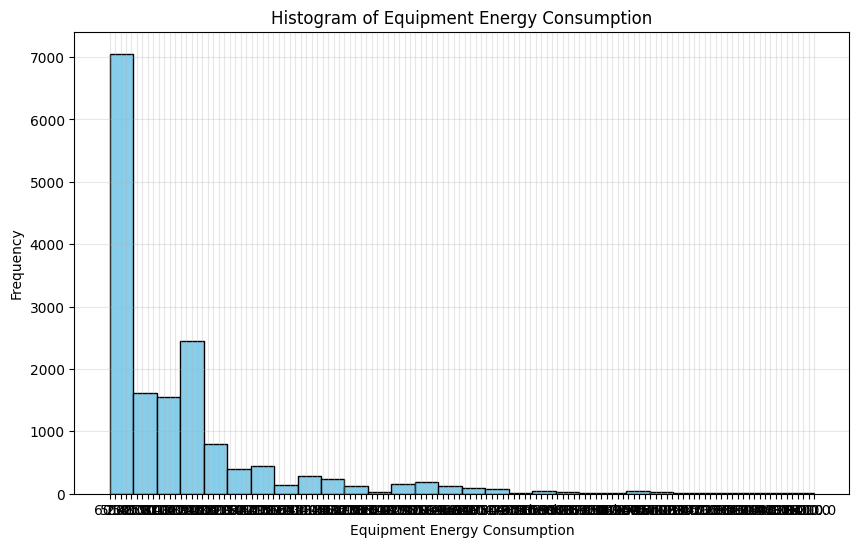

In [79]:
plt.figure(figsize=(10, 6))
plt.hist(df['equipment_energy_consumption'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Equipment Energy Consumption')
plt.ylabel('Frequency')
plt.title('Histogram of Equipment Energy Consumption')
plt.grid(alpha=0.3)
plt.show()



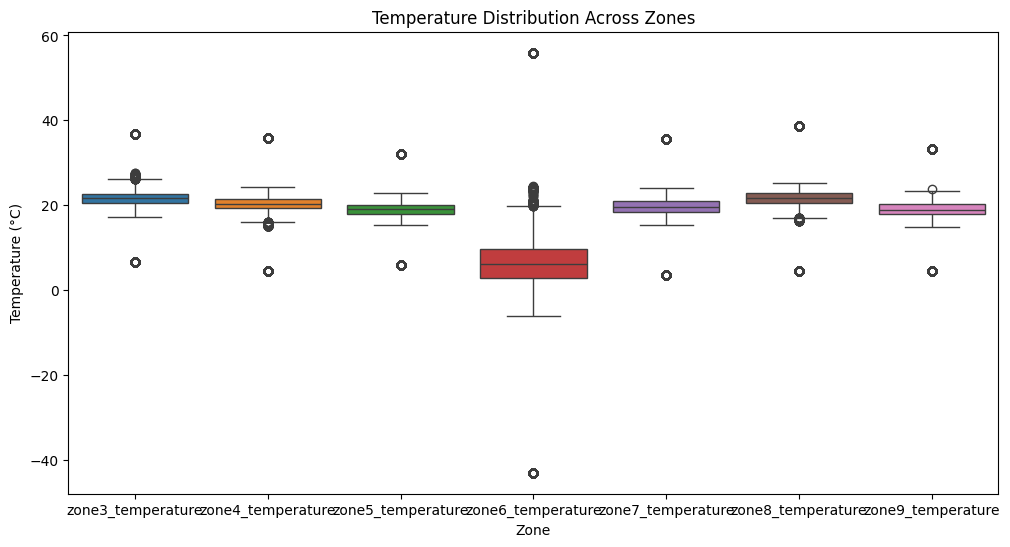

In [80]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[[f'zone{i}_temperature' for i in range(1, 10)]])
plt.title('Temperature Distribution Across Zones')
plt.xlabel('Zone')
plt.ylabel('Temperature (°C)')
plt.show()

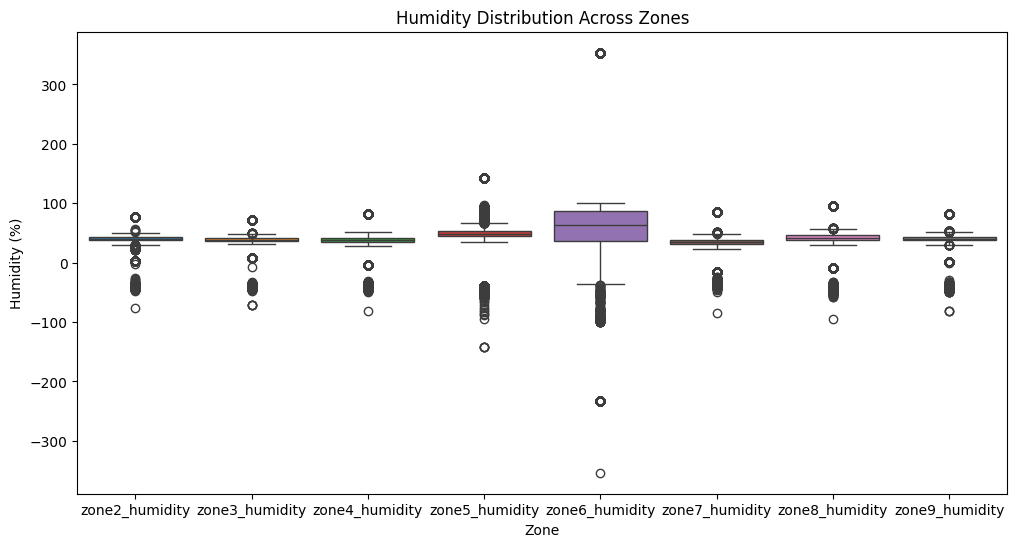

In [81]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[[f'zone{i}_humidity' for i in range(1, 10)]])
plt.title('Humidity Distribution Across Zones')
plt.xlabel('Zone')
plt.ylabel('Humidity (%)')
plt.show()







#### By observation the humiditiy data is provided in the percentagee(%) as mentioned in the data description file 

In [85]:

humidity_cols = [f'zone{i}_humidity' for i in range(1, 10)]
for col in humidity_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
for col in humidity_cols:
    median_val = df.loc[df[col] >= 0, col].median()
    df.loc[df[col] < 0, col] = median_val